In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# the PCA
# from sklearn.decomposition import PCA
import sklearn.decomposition
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# train and test data splitting
from sklearn.model_selection import train_test_split, KFold

# calculate accuracy of the model (metrics)
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# the SVM
from sklearn.svm import SVC

# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


In [ ]:
TEST_SIZE = 0.1
KFold_N_SPLIT = 5
SHUFFLE = True

In [ ]:

# poly
model_svm_poly = SVC(kernel='poly')

# linear
model_svm_linear = SVC(kernel='linear')

# rbf
model_svm_rbf = SVC(kernel='rbf')

**Import file**

We import the .csv file and create a data frame.

In [ ]:
from google.colab import files
uploaded = files.upload()

# create dataframe
df = pd.read_csv('data.csv', nrows=2214)
df

Saving data.csv to data (2).csv


,Year,Y,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),...,Use decorations on the roof,Building surface decorations,Green wall,Garden,Mean,Varresult,Skewresult,Kurtresult,Energy,Entropy
0,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,1.215360e-06,0.008411,7.108349
1,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,1.215360e-06,0.008411,7.108349
2,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,1.215360e-06,0.008411,7.108349
3,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,1.215360e-06,0.008411,7.108349
4,94,15.4,6.0,15.0,0,2,3,3.0,1.9,1.9,...,0.0,0.0,0,1,75.766784,1545.385163,0.000011,1.215360e-06,0.008411,7.108349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2209,97,11.0,7.0,48.0,0,6,3,5.0,1.4,1.4,...,0.0,0.0,0,0,168.953579,3868.531016,-0.000002,1.590000e-07,0.007100,7.537913
2210,97,11.0,7.0,48.0,0,6,3,11.0,1.4,1.4,...,0.0,0.0,0,0,168.953579,3868.531016,-0.000002,1.590000e-07,0.007100,7.537913
2211,97,11.0,7.0,48.0,0,6,3,11.0,1.4,1.4,...,0.0,0.0,0,0,168.953579,3868.531016,-0.000002,1.590000e-07,0.007100,7.537913
2212,97,11.0,7.0,48.0,0,6,3,11.0,1.4,1.4,...,0.0,0.0,0,0,168.953579,3868.531016,-0.000002,1.590000e-07,0.007100,7.537913


In [ ]:
df.describe()

,Year,Y,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),...,Use decorations on the roof,Building surface decorations,Green wall,Garden,Mean,Varresult,Skewresult,Kurtresult,Energy,Entropy
count,2214.000000,2214.000000,2213.000000,2213.000000,2214.000000,2214.000000,2214.000000,2213.000000,2214.000000,2213.000000,...,2213.000000,2213.000000,2214.000000,2214.000000,2214.000000,2214.000000,2.214000e+03,2.214000e+03,2214.000000,2214.000000
mean,95.664860,10.060117,5.842747,17.802531,3.779584,2.013550,2.495032,5.851333,0.940448,1.446251,...,0.099413,0.040669,0.005872,0.438121,136.281668,4436.027111,3.586553e-07,2.160466e-07,0.019109,7.274046
std,1.212848,9.368789,0.770523,9.109508,4.690340,0.756234,0.725697,3.993105,0.945343,0.845424,...,0.299283,0.196419,0.076419,0.496268,24.609049,1604.396593,2.923186e-06,4.600918e-07,0.026970,0.482429
min,94.000000,0.000000,3.000000,2.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,68.578317,888.813117,-1.760000e-05,1.400000e-08,0.004516,5.153808
25%,94.000000,3.300000,5.000000,12.000000,0.000000,2.000000,2.000000,3.000000,0.500000,0.980000,...,0.000000,0.000000,0.000000,0.000000,120.726551,3351.823700,-8.970000e-07,5.730000e-08,0.005910,7.085036
50%,96.000000,7.100000,6.000000,15.000000,4.000000,2.000000,2.000000,5.000000,0.750000,1.318000,...,0.000000,0.000000,0.000000,0.000000,138.375068,4181.889836,6.570000e-09,1.190000e-07,0.007927,7.400755
75%,97.000000,13.700000,6.000000,20.000000,5.000000,2.000000,3.000000,9.000000,1.300000,1.800000,...,0.000000,0.000000,0.000000,1.000000,152.766083,5633.181996,9.120000e-07,2.100000e-07,0.015651,7.650539
max,97.000000,44.500000,8.000000,56.000000,30.000000,6.000000,10.000000,14.000000,11.960000,6.100000,...,1.000000,1.000000,1.000000,1.000000,210.352583,9715.692505,1.780000e-05,7.460000e-06,0.197359,7.902390


**Missing Data**

We first find the number and feature titles of the missing data. There are lots of methods to handle missing data, but as seen in the results, there are only 17 missing cells and also almost all of them are from different features so it's resonable to simply remove the rows according to the different nature of each feature.

In [ ]:
#delete missing
missings = np.argwhere(np.isnan(df.values))
print(missings.shape,"\n")
for i in range(16):
    print(df.columns[missings[i][1]])

df = df.dropna(axis = 0)


(17, 2) 

Color type
Number of windows
Number of floors
General form of the building
Entrance form
Protrusion or indentation of windows
Line type (curved and smooth)
Balcony length
Balcony length
Entrance form
Number of materials used
Distance between windows (maximum)
Separation of the roof from the building
Building surface decorations
Protrusion or indentation of windows
Use decorations on the roof


**Binning**

Given the Y column is in the range of 0 to 45, implementation of **Discretization** and splitting it to 4 discrete classes is as follows:

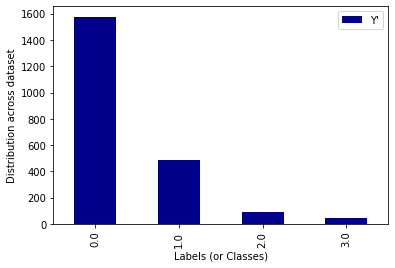

In [ ]:
# binning
df_binning = df.drop('Y', axis=1)
df_binning['Y\''] = df['Y'] // 12
# df_binning

df_binning['Y\''].unique()
label_count = df_binning.groupby('Y\'').size()
df_binning['Y\''].value_counts().plot.bar(color='darkblue')
plt.xlabel("Labels (or Classes)")
plt.ylabel("Distribution across dataset")
plt.legend()

**Drop the target variable column**

In [ ]:
X = df_binning.drop('Y\'', axis=1)
Y = df_binning['Y\'']
# X
# Y

**PCA**

PCA is a non-parametic method which transforms a dataset with higher number of variables(here it will be features) into a much smaller set of uncorrelated variables called Principal Components.

A dataset with N attributes to a dataset with K best informative attributes(PCs) for dimentionality reduction.
maximum variance belongs to the first PC.

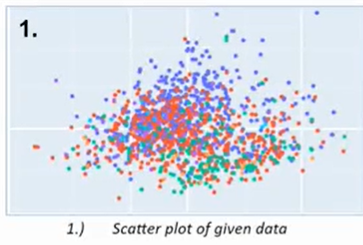

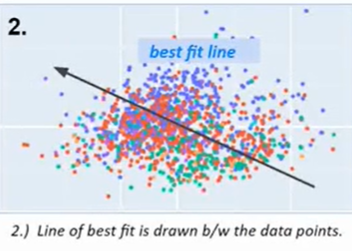

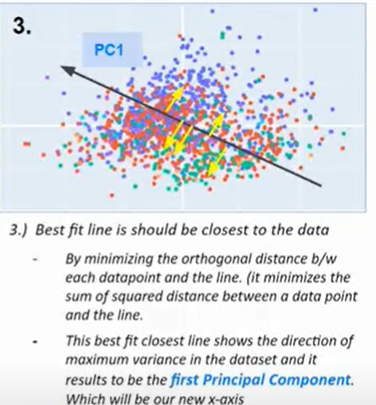

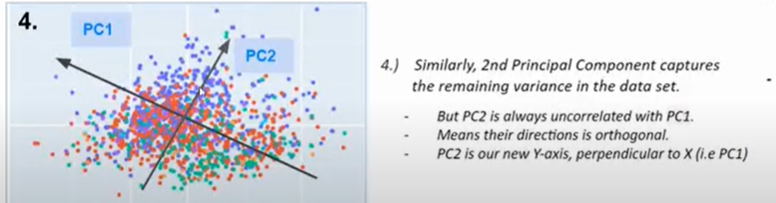

Each Principal Component has two attributes associated with it.

**Eigenvectors**: tells us the direction of the line, PCs direction in which our data are dispersed.

**Eigenvalues**: tells us how the data set is spread out on that line. Gives variances explained by each PC and their relative importance.

* the higher the eigenvalue, the more important that PC is.

Transformed data = Original data * significant PC(Projection Matrix)

**1.Standard Scaling / Z-score Normalization (around μ=0, σ=1)**

We need standardization whenever our data has features in different range or scale. Because those features will contribute unequally to the analysis and will end up creating a bais. Using Z-score Normalization, we are centering and scaling independently on each feature, rescaled feature shows gaussian distribution properties : μ=0 and σ=1, unlike Min-Max sclaer, Standard scaler is less susceptible to outliers. Because Min-Max Scalar scales the data in the range [0,1].

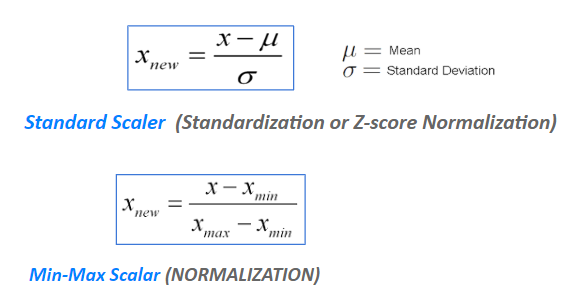

In [ ]:
#first way
# def standardScaler(input):
#   scaled_input = (input - np.mean(input, axis=0)) / np.std(input, axis=0)
#   return scaled_input

# scaled_df = standardScaler(X)
# scaled_df = np.around(X, 36)
# scaled_df

#second way
scaler = sklearn.preprocessing.StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)
print("\nScaled dataframe dimension : ", scaled_df.shape)
scaled_df


Scaled dataframe dimension :  (2197, 37)


,Year,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),Number of materials used,...,Use decorations on the roof,Building surface decorations,Green wall,Garden,Mean,Varresult,Skewresult,Kurtresult,Energy,Entropy
0,-1.377646,0.207459,-0.304904,-0.805793,-0.014519,0.694924,-0.710908,1.013645,0.535174,0.853147,...,-0.331899,-0.206689,-0.077152,1.139349,-2.468628,-1.804941,3.816838,2.173066,-0.397271,-0.343014
1,-1.377646,0.207459,-0.304904,-0.805793,-0.014519,0.694924,-0.710908,1.013645,0.535174,0.853147,...,-0.331899,-0.206689,-0.077152,1.139349,-2.468628,-1.804941,3.816838,2.173066,-0.397271,-0.343014
2,-1.377646,0.207459,-0.304904,-0.805793,-0.014519,0.694924,-0.710908,1.013645,0.535174,0.853147,...,-0.331899,-0.206689,-0.077152,1.139349,-2.468628,-1.804941,3.816838,2.173066,-0.397271,-0.343014
3,-1.377646,0.207459,-0.304904,-0.805793,-0.014519,0.694924,-0.710908,1.013645,0.535174,0.853147,...,-0.331899,-0.206689,-0.077152,1.139349,-2.468628,-1.804941,3.816838,2.173066,-0.397271,-0.343014
4,-1.377646,0.207459,-0.304904,-0.805793,-0.014519,0.694924,-0.710908,1.013645,0.535174,0.853147,...,-0.331899,-0.206689,-0.077152,1.139349,-2.468628,-1.804941,3.816838,2.173066,-0.397271,-0.343014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,1.101891,1.506000,3.331526,-0.805793,5.301795,0.694924,-0.209587,0.485974,-0.054942,-0.933663,...,-0.331899,-0.206689,-0.077152,-0.877694,1.331648,-0.355168,-0.902531,-0.122485,-0.445757,0.545812
2193,1.101891,1.506000,3.331526,-0.805793,5.301795,0.694924,-0.209587,0.485974,-0.054942,-0.933663,...,-0.331899,-0.206689,-0.077152,-0.877694,1.331648,-0.355168,-0.902531,-0.122485,-0.445757,0.545812
2194,1.101891,1.506000,3.331526,-0.805793,5.301795,0.694924,1.294375,0.485974,-0.054942,-0.933663,...,-0.331899,-0.206689,-0.077152,-0.877694,1.331648,-0.355168,-0.902531,-0.122485,-0.445757,0.545812
2195,1.101891,1.506000,3.331526,-0.805793,5.301795,0.694924,1.294375,0.485974,-0.054942,-0.933663,...,-0.331899,-0.206689,-0.077152,-0.877694,1.331648,-0.355168,-0.902531,-0.122485,-0.445757,0.545812


**2. Computing Covariance Matrix**

It shows us the linear relationship between features, whether they tend to move in same direction or inverse direction.

N-dimensional dataset always gives a N*N order Covariance Matrix. If both variables tend to increase or decrease together, the coefficient is positive. If one variable tends to increase as the other decreases, the coefficient is negative.


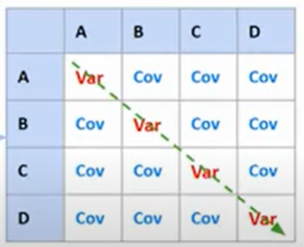

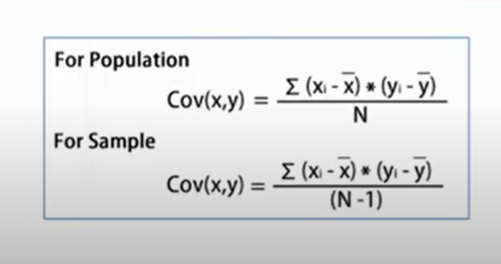

In [ ]:
def calcuteCovarianceMatrix(input):
  length_input = input.shape[0]
  covariance = input.T.dot(input/length_input)
  return covariance

cov = calcuteCovarianceMatrix(scaled_df)
cov = np.round(cov,1)#3
cov

,Year,Number of floors,Number of windows,Number of balconies,Number of entrances,Number of colors used,Color type,Distance between windows (minimum),Distance between windows (maximum),Number of materials used,...,Use decorations on the roof,Building surface decorations,Green wall,Garden,Mean,Varresult,Skewresult,Kurtresult,Energy,Entropy
Year,1.0,-0.0,0.1,0.1,0.1,-0.1,-0.0,-0.1,-0.1,-0.3,...,-0.1,-0.1,-0.0,0.2,0.2,0.1,-0.2,-0.1,0.1,0.0
Number of floors,-0.0,1.0,0.6,0.3,0.0,-0.0,-0.1,0.0,0.1,-0.2,...,0.1,0.1,0.0,-0.2,0.0,-0.2,0.0,0.1,-0.1,0.1
Number of windows,0.1,0.6,1.0,0.3,0.3,0.0,-0.0,-0.1,0.0,-0.2,...,0.1,0.1,0.1,-0.1,-0.0,-0.1,0.0,0.1,-0.1,0.1
Number of balconies,0.1,0.3,0.3,1.0,-0.0,0.2,0.1,-0.1,-0.2,-0.1,...,0.0,0.1,0.1,0.1,0.0,0.2,0.0,-0.1,0.1,-0.1
Number of entrances,0.1,0.0,0.3,-0.0,1.0,-0.0,0.0,-0.1,0.0,-0.0,...,-0.2,-0.1,-0.0,0.1,0.1,0.1,-0.1,-0.0,0.0,0.0
Number of colors used,-0.1,-0.0,0.0,0.2,-0.0,1.0,0.2,0.0,0.1,0.3,...,0.1,-0.0,0.0,0.1,-0.1,0.2,0.1,-0.1,0.0,0.1
Color type,-0.0,-0.1,-0.0,0.1,0.0,0.2,1.0,-0.0,0.0,0.0,...,-0.0,-0.0,0.0,0.0,-0.1,0.1,0.0,-0.0,-0.0,0.0
Distance between windows (minimum),-0.1,0.0,-0.1,-0.1,-0.1,0.0,-0.0,1.0,0.2,0.1,...,0.1,-0.0,-0.0,-0.1,-0.0,-0.2,0.0,0.0,-0.1,0.0
Distance between windows (maximum),-0.1,0.1,0.0,-0.2,0.0,0.1,0.0,0.2,1.0,0.1,...,-0.0,-0.0,-0.1,-0.1,-0.1,-0.1,0.1,0.1,-0.1,0.0
Number of materials used,-0.3,-0.2,-0.2,-0.1,-0.0,0.3,0.0,0.1,0.1,1.0,...,-0.0,0.1,0.0,0.1,-0.1,0.2,0.1,-0.0,-0.0,0.0


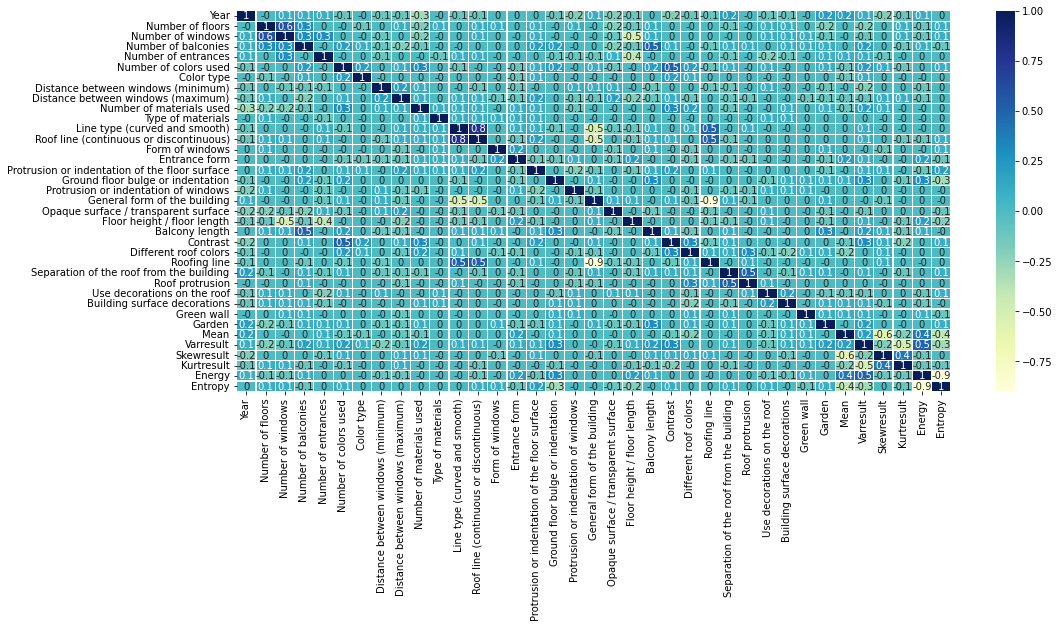

In [ ]:
#plotting the covariance matrix

figure = plt.figure(figsize = (16,7))
sns.heatmap(cov,annot=True, fmt='g', linewidths=.1, cmap="YlGnBu")
plt.show()

**3. Eigen Decomposition of Covariance Matrix**

NxN order covariance matrix gives "N" eigen vectors and their corresponding "N" eigen values.

**Eigenvector** : tells the direction of the PC(principal components) (or, direction in which the data is dispersed).

**Eigenvalues** : gives variances explained by each PC and their relative importance. (Higher the eigenvalue, more the variation captured & hence more significant that PC is.)

In [ ]:
eig_values, eig_vectors = np.linalg.eig(cov)
print('\nNumber of Eigenvectors : %s ' %len(eig_vectors))
print('\nEigenvectors : \n\n%s' %eig_vectors)
print('\nEigenvalues : \n\n%s' %eig_values)


Number of Eigenvectors : 37 

Eigenvectors : 

[[ 1.37386932e-01 -1.15867588e-02 -5.47200963e-02 ... -8.36816435e-02
  -1.97129446e-01  1.58552021e-01]
 [-1.28958547e-01 -7.03165499e-05  6.63309088e-02 ...  1.34644082e-01
  -2.55449013e-02 -5.77907232e-02]
 [-1.30579978e-01 -4.49550228e-02  1.04210001e-01 ... -2.01737832e-01
   6.80879145e-02  5.37485891e-02]
 ...
 [-1.64486604e-01  1.87220594e-01 -6.24046056e-02 ... -9.89064383e-02
  -1.12526943e-01  6.05373317e-03]
 [ 3.65140115e-01 -2.43629871e-01 -1.63262714e-01 ... -5.38030317e-02
   1.08963580e-01 -4.24516234e-03]
 [-3.12767791e-01  1.66728068e-01  2.24491171e-01 ... -6.15344620e-02
  -1.29667406e-01 -8.72422001e-02]]

Eigenvalues : 

[ 3.21799028  3.00301603  2.60210138  2.46861974  1.96488159  1.78562932
  1.75389441  1.55063506  1.40871488  1.34036263  1.25976009 -0.01157602
  0.05067922  0.07131587  0.15408284  0.18193293  0.22766032  0.28857696
  0.33517325  0.31392277  1.07789601  1.059397    1.01461773  0.9925914
  0.9333

**Visualize above eigenvectors**

Each PC is a linear combination of all the original variables or attributes.
X_i are the original variables, and - Beta_i are the corresponding weights or so called PCA coefficients.



image.png

In [ ]:
eig_vectors_df = pd.DataFrame(eig_vectors)
eig_vectors_df.columns = ['eigvector_'+str(i+1) for i in range(0, len(eig_vectors))]
eig_vectors_df.T

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
eigvector_1,0.137387,-0.128959,-0.130580,0.090549,-0.049295,0.038219,0.000372,-0.037400,-0.161337,-0.030738,...,-0.071397,0.011934,0.072328,0.084640,0.262465,0.276493,-0.192662,-0.164487,0.365140,-0.312768
eigvector_2,-0.011587,-0.000070,-0.044955,-0.195858,-0.098805,-0.100375,-0.049641,0.146382,0.046037,-0.090236,...,0.074708,-0.024198,-0.079538,-0.100650,-0.161609,-0.351119,0.074337,0.187221,-0.243630,0.166728
eigvector_3,-0.054720,0.066331,0.104210,0.256204,-0.022902,0.415505,0.166090,-0.004983,0.017626,0.176453,...,0.041491,0.016939,0.022943,0.151241,-0.250418,0.106624,0.153757,-0.062405,-0.163263,0.224491
eigvector_4,-0.291005,-0.363553,-0.458678,-0.285974,-0.187532,0.126376,0.072492,0.119812,0.106288,0.330621,...,0.010836,-0.059638,-0.043759,-0.039937,-0.138333,0.084077,0.157803,-0.017131,0.079141,-0.104867
eigvector_5,0.307968,-0.313755,-0.154267,-0.146432,0.158179,-0.092206,0.018856,-0.131034,-0.147458,-0.087244,...,-0.208004,-0.264963,-0.004862,0.203505,-0.010527,0.009357,-0.104357,-0.103740,-0.104250,0.168902
eigvector_6,-0.045754,0.081712,-0.051656,0.187004,-0.325242,-0.072112,-0.051053,-0.120974,-0.308633,-0.155835,...,0.099690,-0.052512,0.108148,0.041818,-0.232349,-0.147105,0.347861,0.256734,0.091597,-0.115406
eigvector_7,0.043481,-0.035430,-0.188968,-0.023462,-0.252779,-0.003868,-0.040822,-0.017551,-0.231003,0.022442,...,0.239567,0.220014,-0.077028,0.088450,0.050156,0.073243,-0.284002,-0.328654,-0.268677,0.384899
eigvector_8,-0.067134,0.176623,0.114073,0.023431,-0.179960,0.007473,0.033674,0.211860,0.092041,-0.115939,...,0.329735,0.099772,0.079290,-0.363945,0.182579,-0.037375,-0.221054,-0.159854,0.053514,-0.100224
eigvector_9,0.018606,0.207730,0.161064,-0.045051,0.122200,0.058014,0.047158,-0.135560,-0.135130,0.136742,...,-0.089948,-0.256363,-0.018116,-0.306274,0.040008,-0.000068,-0.008798,0.032353,0.110428,-0.028197
eigvector_10,-0.243885,-0.034972,0.155824,-0.098029,0.259917,0.052702,-0.031943,0.058473,-0.224126,0.139365,...,0.058599,0.176885,0.323367,0.217642,0.034998,0.005387,-0.104458,0.011237,-0.056898,0.018013


0.137387	in eigvector_1 row and column 0, shows weight applied to the first feature in the PC1 and so on for all 37 Pcs and for all features.

**4. Sort the Eigenvalues in descending order**

In [ ]:
index = eig_values.argsort()[::-1]
eig_values = eig_values[index]
eig_vectors = eig_vectors[:, index]
sorted_eig_pairs = [(np.around(np.abs(eig_values[i]),3), eig_vectors[:,i]) for i in range(len(eig_values))]
print('\nSorted Eigen-pairs (descending order) :\n')

sorted_eigenValues = []
for i in range(0, len(sorted_eig_pairs)):
    print("eigenvec_{0} : {1}".format(str(i+1), str(sorted_eig_pairs[i][0])))
    sorted_eigenValues.append(sorted_eig_pairs[i][0])


print("\nTotal Variance (sum of all eigenvalues) : ", round(sum(sorted_eigenValues), 3))


Sorted Eigen-pairs (descending order) :

eigenvec_1 : 3.218
eigenvec_2 : 3.003
eigenvec_3 : 2.602
eigenvec_4 : 2.469
eigenvec_5 : 1.965
eigenvec_6 : 1.786
eigenvec_7 : 1.754
eigenvec_8 : 1.551
eigenvec_9 : 1.409
eigenvec_10 : 1.34
eigenvec_11 : 1.26
eigenvec_12 : 1.078
eigenvec_13 : 1.059
eigenvec_14 : 1.015
eigenvec_15 : 0.993
eigenvec_16 : 0.933
eigenvec_17 : 0.911
eigenvec_18 : 0.888
eigenvec_19 : 0.816
eigenvec_20 : 0.768
eigenvec_21 : 0.722
eigenvec_22 : 0.69
eigenvec_23 : 0.636
eigenvec_24 : 0.558
eigenvec_25 : 0.541
eigenvec_26 : 0.54
eigenvec_27 : 0.46
eigenvec_28 : 0.426
eigenvec_29 : 0.335
eigenvec_30 : 0.314
eigenvec_31 : 0.289
eigenvec_32 : 0.228
eigenvec_33 : 0.182
eigenvec_34 : 0.154
eigenvec_35 : 0.071
eigenvec_36 : 0.051
eigenvec_37 : 0.012

Total Variance (sum of all eigenvalues) :  37.027


**5. Calculation of "K" value**

There are different methods to determine the K value(No. of Principal Components)
Kaiser's Stopping Rule, Scree Test Rule, Cumulative Variance Rule, Heuristic Rule.

We implemented **Cumulative Variance Rule**:

To find the variance explained by each component : We should divide each component’s eigenvalue by the sum of all eigenvalues.
To find the cumulative variance explained by a component C3 : We should add the variance explained by components (C1, C2, C3).



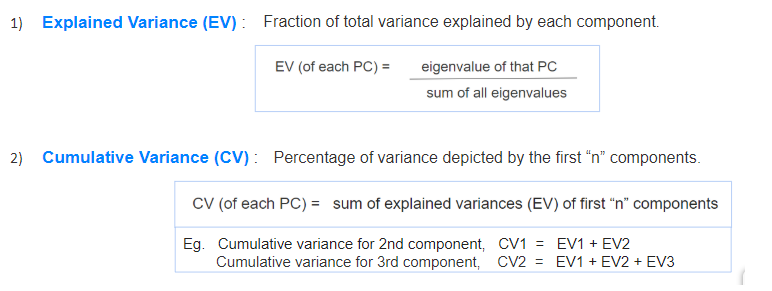

In [ ]:
cumulative_variance = {}
ith_cum_var = 0
for i in range(0, len(sorted_eig_pairs)):
    ith_ex_var = sorted_eig_pairs[i][0]/sum(sorted_eigenValues)
    # print(ith_explained_variance)
    ith_cum_var += ith_ex_var
    cumulative_variance[str(i+1)] = round(ith_cum_var*100, 3)

print("\nCumulative Variance Percentage : ")
cumulative_variance



Cumulative Variance Percentage : 


{'1': 8.691,
 '2': 16.801,
 '3': 23.829,
 '4': 30.497,
 '5': 35.804,
 '6': 40.627,
 '7': 45.364,
 '8': 49.553,
 '9': 53.358,
 '10': 56.977,
 '11': 60.38,
 '12': 63.292,
 '13': 66.152,
 '14': 68.893,
 '15': 71.575,
 '16': 74.095,
 '17': 76.555,
 '18': 78.953,
 '19': 81.157,
 '20': 83.231,
 '21': 85.181,
 '22': 87.045,
 '23': 88.762,
 '24': 90.269,
 '25': 91.73,
 '26': 93.189,
 '27': 94.431,
 '28': 95.582,
 '29': 96.486,
 '30': 97.334,
 '31': 98.115,
 '32': 98.731,
 '33': 99.222,
 '34': 99.638,
 '35': 99.83,
 '36': 99.968,
 '37': 100.0}

The best ones are ones with a value greater than 85%.
 which are number 21 downto 37.
  therefor K eaquals to 17.

**6. Projection matrix construction**

Each PC in Projection Matrix depicts an axis of the new feature space where we would be projecting our original dataset.

In [ ]:
K = 17
projection_matrix = np.array([list(np.hstack(i[1].reshape(37,1))) for i in sorted_eig_pairs[:]])
projection_matrix = projection_matrix[:K]
print("\nProjection-Matrix Dimension ... ", projection_matrix.shape)
projection_matrix

projection_matrix_df = pd.DataFrame(projection_matrix)
projection_matrix_df.columns = [str(i+1) for i in range(0, len(eig_vectors))]
projection_matrix_df = projection_matrix_df.set_index([pd.Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17'])])
projection_matrix_df


Projection-Matrix Dimension ...  (17, 37)


,1,2,3,4,5,6,7,8,9,10,...,28,29,30,31,32,33,34,35,36,37
PC1,0.137387,-0.128959,-0.130580,0.090549,-0.049295,0.038219,0.000372,-0.037400,-0.161337,-0.030738,...,-0.071397,0.011934,0.072328,0.084640,0.262465,0.276493,-0.192662,-0.164487,0.365140,-0.312768
PC2,-0.011587,-0.000070,-0.044955,-0.195858,-0.098805,-0.100375,-0.049641,0.146382,0.046037,-0.090236,...,0.074708,-0.024198,-0.079538,-0.100650,-0.161609,-0.351119,0.074337,0.187221,-0.243630,0.166728
PC3,-0.054720,0.066331,0.104210,0.256204,-0.022902,0.415505,0.166090,-0.004983,0.017626,0.176453,...,0.041491,0.016939,0.022943,0.151241,-0.250418,0.106624,0.153757,-0.062405,-0.163263,0.224491
PC4,-0.291005,-0.363553,-0.458678,-0.285974,-0.187532,0.126376,0.072492,0.119812,0.106288,0.330621,...,0.010836,-0.059638,-0.043759,-0.039937,-0.138333,0.084077,0.157803,-0.017131,0.079141,-0.104867
PC5,0.307968,-0.313755,-0.154267,-0.146432,0.158179,-0.092206,0.018856,-0.131034,-0.147458,-0.087244,...,-0.208004,-0.264963,-0.004862,0.203505,-0.010527,0.009357,-0.104357,-0.103740,-0.104250,0.168902
PC6,-0.045754,0.081712,-0.051656,0.187004,-0.325242,-0.072112,-0.051053,-0.120974,-0.308633,-0.155835,...,0.099690,-0.052512,0.108148,0.041818,-0.232349,-0.147105,0.347861,0.256734,0.091597,-0.115406
PC7,0.043481,-0.035430,-0.188968,-0.023462,-0.252779,-0.003868,-0.040822,-0.017551,-0.231003,0.022442,...,0.239567,0.220014,-0.077028,0.088450,0.050156,0.073243,-0.284002,-0.328654,-0.268677,0.384899
PC8,-0.067134,0.176623,0.114073,0.023431,-0.179960,0.007473,0.033674,0.211860,0.092041,-0.115939,...,0.329735,0.099772,0.079290,-0.363945,0.182579,-0.037375,-0.221054,-0.159854,0.053514,-0.100224
PC9,0.018606,0.207730,0.161064,-0.045051,0.122200,0.058014,0.047158,-0.135560,-0.135130,0.136742,...,-0.089948,-0.256363,-0.018116,-0.306274,0.040008,-0.000068,-0.008798,0.032353,0.110428,-0.028197
PC10,-0.243885,-0.034972,0.155824,-0.098029,0.259917,0.052702,-0.031943,0.058473,-0.224126,0.139365,...,0.058599,0.176885,0.323367,0.217642,0.034998,0.005387,-0.104458,0.011237,-0.056898,0.018013


**Finding the Original names of selected features**


In [ ]:
nums = []
for irow,row in enumerate(projection_matrix_df.index):
  # print(projection_matrix_df.iloc[irow].max())
  # print(projection_matrix_df.iloc[irow].idxmax())
  # print(scaled_df.columns[int(projection_matrix_df.iloc[irow].idxmax())-1])
  nums.append(scaled_df.columns[int(projection_matrix_df.iloc[irow].idxmax())-1])



**7. Transformation of original dataset to new feature space**

We will transform the "N" dimensional orginal dataset "X" to project it into new feature space "X'".
This will be done using projection matrix "Pm" obtained above.

Formula : X' = X * (Pm)


In [ ]:
scaled_df.shape
transformedData = (scaled_df).dot(projection_matrix.T)
transformedData.columns = [str(nums[i]) for i in range(0, K)]

transformedData

,Energy,General form of the building,Number of colors used,Number of materials used,Separation of the roof from the building,Skewresult,Entropy,Roof protrusion,Entrance form,Protrusion or indentation of windows,Type of materials,Distance between windows (minimum),Opaque surface / transparent surface,Color type,Color type,Distance between windows (maximum),Type of materials
0,-2.096116,2.148802,1.489037,1.976923,0.597517,2.916674,-3.391732,-0.851403,-0.627028,0.832766,1.470082,0.487989,-0.028854,-1.794169,0.276964,0.681007,0.258990
1,-2.070027,2.107826,1.496624,1.821738,0.501939,3.003454,-2.933047,-1.188848,-0.292626,0.852329,1.975230,1.051252,-0.059430,-1.220551,0.991155,0.250004,-0.423481
2,-2.119609,2.119649,1.493914,1.982276,0.500176,2.928313,-3.278237,-0.800385,-0.545836,0.755896,1.774009,0.396936,-0.172673,-1.643353,0.163943,0.508277,0.499760
3,-2.093520,2.078674,1.501501,1.827091,0.404597,3.015093,-2.819553,-1.137830,-0.211434,0.775458,2.279157,0.960200,-0.203248,-1.069735,0.878135,0.077273,-0.182711
4,-2.143102,2.090497,1.498791,1.987629,0.402835,2.939951,-3.164742,-0.749367,-0.464644,0.679025,2.077937,0.305884,-0.316491,-1.492537,0.050922,0.335546,0.740530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2192,-1.411653,-0.073959,-0.910579,-4.282208,-0.277461,-3.742604,-1.645045,-0.260552,1.751269,1.629568,-0.777915,-0.534128,-0.024204,-0.302345,-0.059460,0.311594,1.023125
2193,-1.385564,-0.114934,-0.902992,-4.437393,-0.373039,-3.655824,-1.186361,-0.597997,2.085672,1.649131,-0.272767,0.029136,-0.054779,0.271273,0.654731,-0.119409,0.340654
2194,-1.364107,-0.090312,-0.670540,-4.183888,-0.054419,-3.842663,-1.933430,-0.311943,1.659809,1.735268,-1.799878,-0.935853,-0.198072,0.038968,0.798616,0.362163,0.575888
2195,-1.338019,-0.131287,-0.662953,-4.339073,-0.149997,-3.755883,-1.474745,-0.649388,1.994211,1.754831,-1.294730,-0.372589,-0.228647,0.612586,1.512807,-0.068840,-0.106583



**New X,y Defination**

In [ ]:
X = transformedData.values
Y = Y.values

**SVM**

In [ ]:
# SVM Comparison of different methods
svm_linear_err = []
svm_poly_err = []
svm_rbf_err = []

**SVM kernels comparison**

there are three kernels for an SVM model, `linear`, `poly` and `rbf`. to find the best one we will train them on our train data and compare the results.

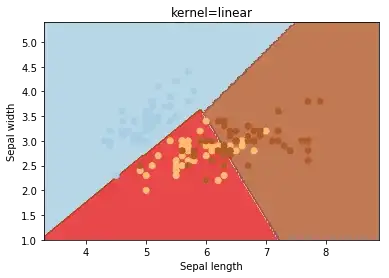 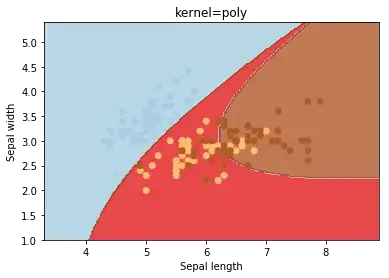  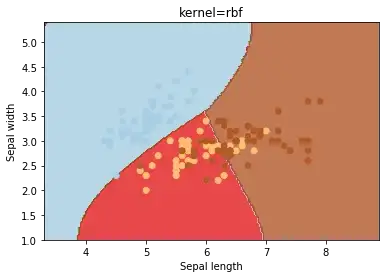


for a more accurate comparison we will use the K-Fold method and compare avarge of each model results. we have used number of errors in prediction of test data as comparision parameter.

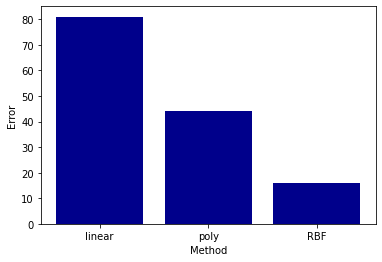

In [ ]:
# KFold
kf = KFold(n_splits=KFold_N_SPLIT, shuffle=SHUFFLE)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    # train with SVM
    model_svm_linear.fit(X_train, Y_train)
    model_svm_poly.fit(X_train, Y_train)
    model_svm_rbf.fit(X_train, Y_train)

    # predict with svm model
    answer_svm_poly = model_svm_poly.predict(X_test)
    answer_svm_linear = model_svm_linear.predict(X_test)
    answer_svm_rbf = model_svm_rbf.predict(X_test)

    # calculate errors
    error_svm_linear = 0
    error_svm_poly = 0
    error_svm_rbf = 0
    for i in range(len(Y_test)):
        if answer_svm_linear[i] != np.array(Y_test)[i]:
            error_svm_linear += 1
        if answer_svm_poly[i] != np.array(Y_test)[i]:
            error_svm_poly += 1
        if answer_svm_rbf[i] != np.array(Y_test)[i]:
            error_svm_rbf += 1
    svm_linear_err.append(error_svm_linear)
    svm_poly_err.append(error_svm_poly)
    svm_rbf_err.append(error_svm_rbf)

# plot SVM methods errors
pltX = ['linear', 'poly', 'RBF']
pltE = [np.mean(error_svm_linear), np.mean(error_svm_poly), np.mean(error_svm_rbf)]
plt.figure('SVM Comparison of different methods')
plt.ylabel('Error')
plt.xlabel('Method')
plt.bar(pltX, pltE, color='darkblue')
plt.show()
# -----------------------------------------------------------------------------------------------------
# we find out that rbf > poly > linear, so we will continue with rbf
# -----------------------------------------------------------------------------------------------------

**gamma parameter**

## the results plot confirm that `rbf` kernel have minimum error. so we will countiue with `rbf` kernel.
rbf svm model have two important parameters, `gamma` and `C`. we have to train our model with different values of this parameters and compare the results.
first we will start with `gamma` parameter. we will train 6 models with gamma = `0.001`, `0.01`, `0.1`, `1.0`, `10.0` and `100.0`. then we will plot models errors in predict of test and train data. the point which both test and train error are minimum is the optimal point.

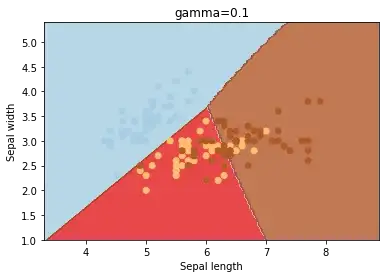  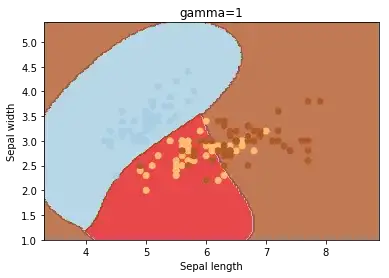  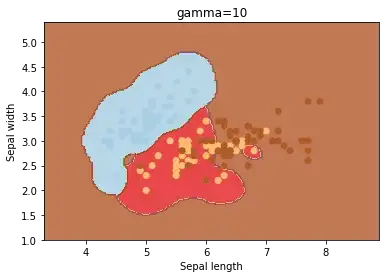  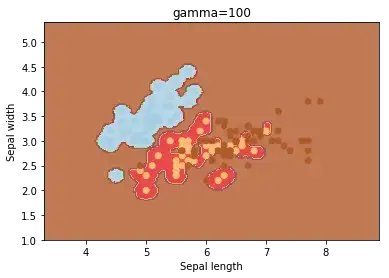

**Split data to three sets**

In [ ]:
# split data to train and test datasets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=TEST_SIZE, shuffle=SHUFFLE)
# print("whole dataset:", X.shape, Y.shape)
# print("training set:", X_train.shape, Y_train.shape)
# print("test set:", X_test.shape, Y_test.shape)


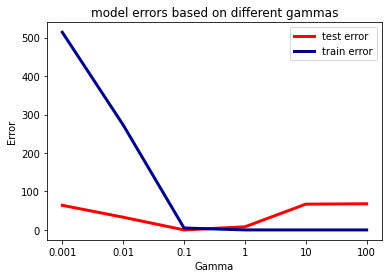

In [ ]:
# let's train model with different gammas
model_svm_rbf_gamma = []
answer_svm_rbf_gamma = []
train_predict_svm_rbf_gamma = []
error_svm_rbf_gamma = []
train_error_svm_rbf_gamma = []
for i in range(6):
    model_svm_rbf_gamma.append(SVC(kernel='rbf', gamma=(0.001*10**i)))
    model_svm_rbf_gamma[i].fit(X_train, Y_train)
    answer_svm_rbf_gamma.append(model_svm_rbf_gamma[i].predict(X_test))
    train_predict_svm_rbf_gamma.append(model_svm_rbf_gamma[i].predict(X_train))
    err = 0
    for j in range(len(Y_test)):
        if answer_svm_rbf_gamma[i][j] != np.array(Y_test)[j]:
            err += 1
    error_svm_rbf_gamma.append(err)
    err = 0
    for k in range(len(Y_train)):
        if train_predict_svm_rbf_gamma[i][k] != np.array(Y_train)[k]:
            err += 1
    train_error_svm_rbf_gamma.append(err)

# over fit and under fit plot
pltX = ['0.001', '0.01', '0.1', '1', '10', '100']
plt.figure('over fit and under fit (best gamma)')
plt.xlabel('Gamma')
plt.ylabel('Error')
plt.title('model errors based on different gammas')
plt.plot(pltX, error_svm_rbf_gamma, label='test error', lw=3, color='red')
plt.plot(pltX, train_error_svm_rbf_gamma, label='train error', lw=3, color='darkblue')
plt.legend(['test error', 'train error'])
plt.show()
# -----------------------------------------------------------------------------------------------------
# best gamma is 0.1
# -----------------------------------------------------------------------------------------------------



**C parameter**

This figure represents underfit and overfit in our models. when `gamma = 0.001` both train and test error are maximum, this represent an underfit model. when `gamma = 100` there is minimum train error but a significant test error which represent an overfit model.
it is clear that when `gamma = 0.1` we have minimum train and test error so it is our optimal point. the best value for `gamma` parameter is `0.1` .

there is one more parameter we have to find a good value for. so we will compare models with different values of `C` parameter as same as `gamma` to find the best value.

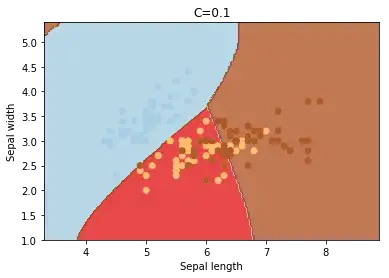  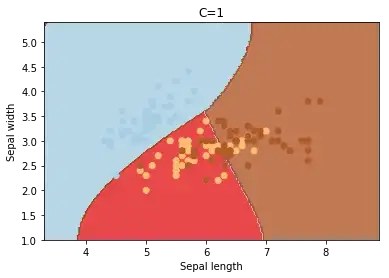  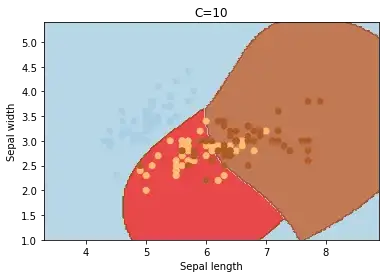  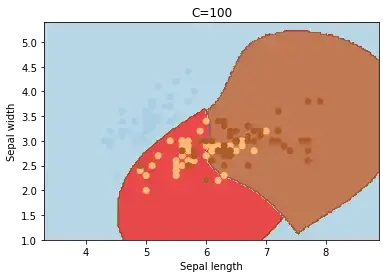

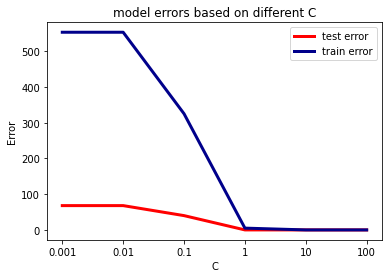

In [ ]:

# let's train model with different C
model_svm_rbf_C = []
answer_svm_rbf_C = []
train_predict_svm_rbf_C = []
error_svm_rbf_C = []
train_error_svm_rbf_C = []
for i in range(6):
    model_svm_rbf_C.append(SVC(kernel='rbf', gamma=0.1, C=(0.001*10**i)))
    model_svm_rbf_C[i].fit(X_train, Y_train)
    answer_svm_rbf_C.append(model_svm_rbf_C[i].predict(X_test))
    train_predict_svm_rbf_C.append(model_svm_rbf_C[i].predict(X_train))
    err = 0
    for j in range(len(Y_test)):
        if answer_svm_rbf_C[i][j] != np.array(Y_test)[j]:
            err += 1
    error_svm_rbf_C.append(err)
    err = 0
    for k in range(len(Y_train)):
        if train_predict_svm_rbf_C[i][k] != np.array(Y_train)[k]:
            err += 1
    train_error_svm_rbf_C.append(err)

# over fit and under fit plot
pltX = ['0.001', '0.01', '0.1', '1', '10', '100']
plt.figure('over fit and under fit (best C)')
plt.plot(pltX, error_svm_rbf_C, color='red',lw=3)
plt.plot(pltX, train_error_svm_rbf_C, color='darkblue', lw=3)
plt.xlabel('C')
plt.ylabel('Error')
plt.legend(['test error', 'train error'])
plt.title('model errors based on different C')
plt.show()
# -----------------------------------------------------------------------------------------------------
# best C is 10
# -----------------------------------------------------------------------------------------------------

**Final SVM model implementation**

the figure show the optimal point is `C = 1`, `10` or `100`. best value for `C` parameter is `10`.

now our model parameters are all set: `kernel = 'rbf'` , `gamma = 0.1` and `C = 10`.

finally we can train and test our model.

In [ ]:
# best SVM model
model_svm_best = SVC(kernel='rbf', gamma=0.1, C=10)
model_svm_best.fit(X_train, Y_train)
test_predict_svm_best = model_svm_best.predict(X_test)
train_predict_svm_best = model_svm_best.predict(X_train)
print('accuracy of the model: ', accuracy_score(test_predict_svm_best, Y_test), '\n')
print('confusion matrix of test data prediction:\n', confusion_matrix(test_predict_svm_best, Y_test), '\n')
print('confusion matrix of train data prediction:\n', confusion_matrix(train_predict_svm_best, Y_train), '\n')
print('classification report of train data:\n', classification_report(train_predict_svm_best, Y_train), '\n')
print('classification report of test data:\n', classification_report(test_predict_svm_best, Y_test), '\n')

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)
# print("whole dataset:", X.shape, y.shape)
# print("training set:", X_train.shape, y_train.shape)
# print("test set:", X_test.shape, y_test.shape)


accuracy of the model:  1.0 

confusion matrix of test data prediction:
 [[152   0   0   0]
 [  0  51   0   0]
 [  0   0  13   0]
 [  0   0   0   4]] 

confusion matrix of train data prediction:
 [[1424    0    0    0]
 [   0  434    0    0]
 [   0    0   76    0]
 [   0    0    0   43]] 

classification report of train data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1424
         1.0       1.00      1.00      1.00       434
         2.0       1.00      1.00      1.00        76
         3.0       1.00      1.00      1.00        43

    accuracy                           1.00      1977
   macro avg       1.00      1.00      1.00      1977
weighted avg       1.00      1.00      1.00      1977
 

classification report of test data:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       152
         1.0       1.00      1.00      1.00        51
         2.0       1.00      1.00 

**Random Forest**

Random forest contains of several decision trees all of which are not fully optimized. Tuning random forests are much easier than decision trees as each tree has random parameters and is not optimized. We need to optimize only two parameters to get the best result from the random forest.


1.   n_estimators
2.   max_features

"max_features" is the number of features to consider at each split. We choose the "max_features" parameter as the square root of the number of features (a general good practice)

"n_estimators" is the number of decision trees in the forest. To find the optimal "n_estimators", we define a random forest for each number of estimators
and evaluate their accuracy. After a certain number of estimators, the accuracy levels out so we can choose the optimal value according to that point. This operation obviously takes time.

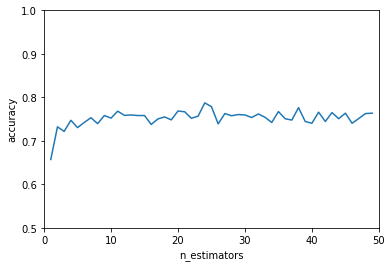

In [ ]:
# find best parameters for random forest
import math
n_estimators = list(range(1, 50, 1))
param_grid = {'n_estimators': n_estimators}
rf = RandomForestClassifier(max_features = round(math.sqrt(len(transformedData.columns))))
gs = GridSearchCV(rf, param_grid, cv=5)
gs.fit(X, Y)
scores = gs.cv_results_['mean_test_score']
plt.plot(n_estimators, scores)
plt.xlabel("n_estimators")
plt.ylabel("accuracy")
plt.xlim(0, 50)
plt.ylim(0.5, 1)
plt.show()

**Creating the optimal model and its evaluation**

From the previous operation, we choose `n_estimators = 10` We use both k-fold and normal data split to evaluate our model

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

    rf = RandomForestClassifier(n_estimators = 10, max_features = round(math.sqrt(len(transformedData.columns))))
    rf.fit(X_train, Y_train)
    Y_pred = rf.predict(X_test)
    # print(confusion_matrix(Y_test, Y_pred))
    accuracy_scores.append(accuracy_score(Y_test, Y_pred))
    precision_scores.append(precision_score(Y_test, Y_pred, average = 'micro'))
    recall_scores.append(recall_score(Y_test, Y_pred, average = 'micro'))
    f1_scores.append(f1_score(Y_test, Y_pred, average = 'micro'))

print("accuracy:", np.mean(accuracy_scores))
print("precision:", np.mean(precision_scores))
print("recall:", np.mean(recall_scores))
print("f1 score:", np.mean(f1_scores),"\n")

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1, shuffle = True)
print("whole dataset:", X.shape, Y.shape)
print("training set:", X_train.shape, y_train.shape)
print("test set:", X_test.shape, y_test.shape, "\n")

rf = RandomForestClassifier(n_estimators = 10, max_features = 6)
rf.fit(X_train, y_train)
answer = rf.predict(X_test)
print("random forest accuracy:", rf.score(X_test, y_test))

accuracy: 0.9685825222613378
precision: 0.9685825222613378
recall: 0.9685825222613378
f1 score: 0.9685825222613378 

whole dataset: (2197, 17) (2197,)
training set: (1977, 17) (1977,)
test set: (220, 17) (220,) 

random forest accuracy: 0.9772727272727273
